Excercise 1 - Review of data wrangling and visualization in Python

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cmdstanpy import CmdStanModel

             theta_1   theta_2   theta_3   theta_4
2018-01-01  0.682693 -3.091767 -0.475717 -0.238530
2018-01-02 -0.283107 -0.979955  1.233933  0.158031
2018-01-03  1.572221 -2.033528  2.196317  0.041347
2018-01-04 -1.042981  0.651530  1.060125  0.064832
2018-01-05 -1.392614 -2.570905 -0.600063 -0.015025


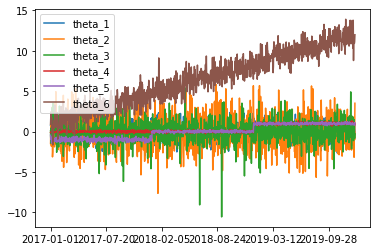

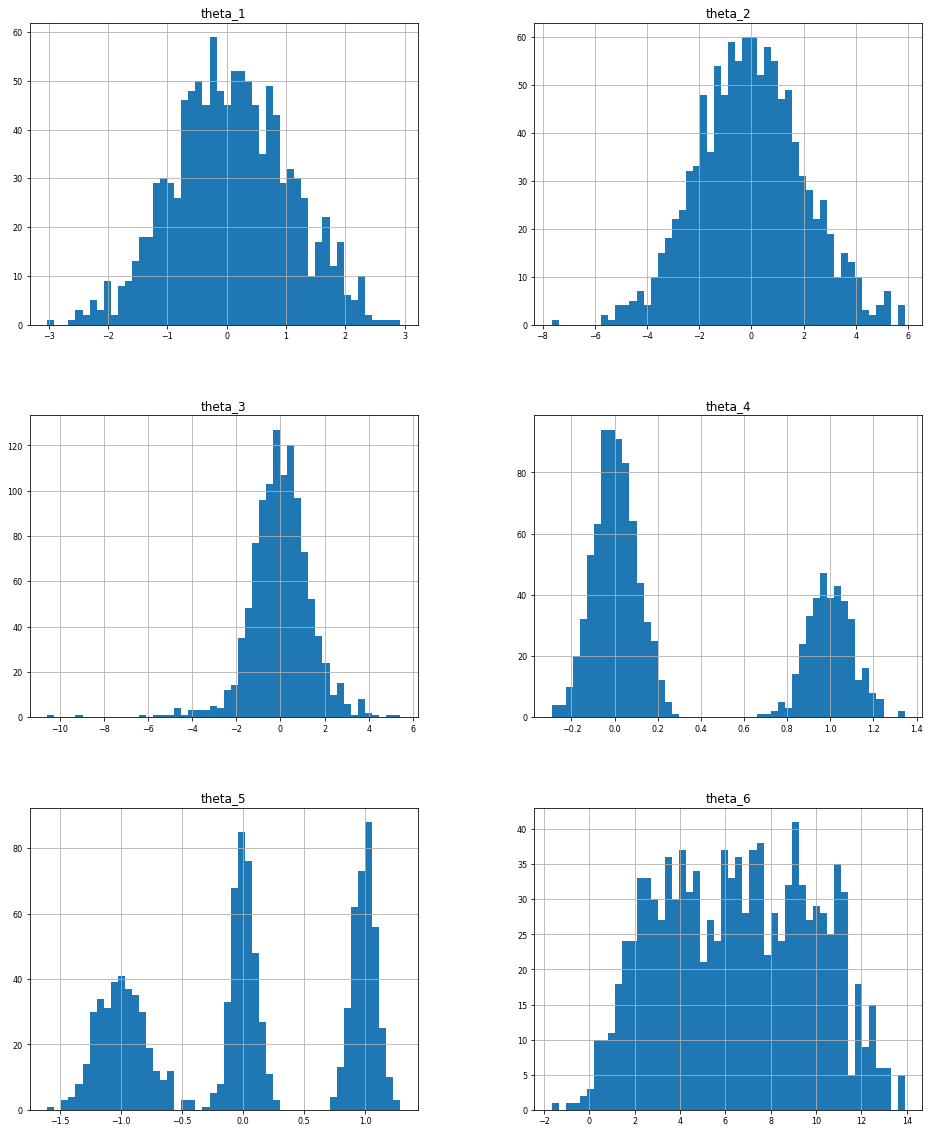

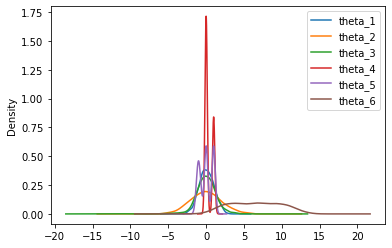

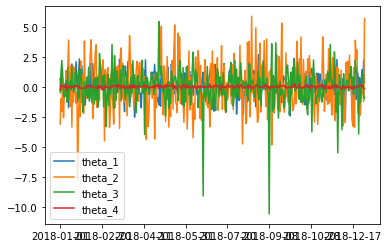

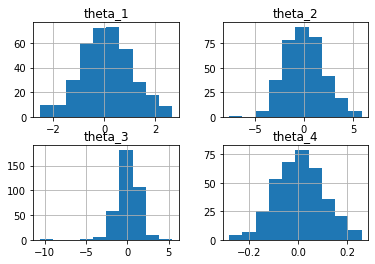

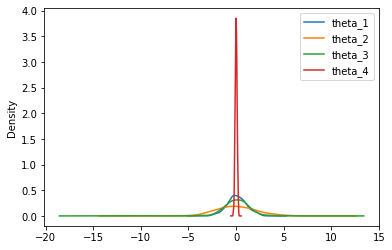

In [3]:
df = pd.read_csv('Data1.csv', index_col=0)

# time series chart
df.plot()

# histogram chart - all parameters
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# KDE
df.plot.kde()

df_2018 = df.loc['2018-01-01':'2018-12-31','theta_1':'theta_4']

print(df_2018.head())
# # repeated for 2018 year
# df.iloc[365:730] or df.loc['2018-01-01':'2018-12-31']
df_2018.plot()

# histogram chart - 4 parameters
df_2018.hist()

# KDE
df_2018.plot.kde()
plt.show()

Excersize 2 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


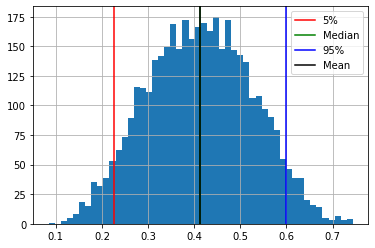

In [6]:
F = len("Agnieszka")
L = len("Welian")
print([0]*F + [1] * L)
stan_data = {
    "N":F+L,
    "y":[0] * F + [1] * L
}

model = CmdStanModel(stan_file='bern_1.stan')
sample = model.sample(stan_data)
theta = sample.stan_variable('theta')
summary = sample.summary()

q5=np.quantile(theta,0.05)
q50=np.quantile(theta,0.5)
q95=np.quantile(theta,0.95)
qMean=theta.mean()

plt.figure()
plt.hist(theta, bins=50)
plt.axvline(q5, color='r')
plt.axvline(q50, color='g')
plt.axvline(q95, color='b')
plt.axvline(qMean, color='k')
plt.grid(True)
plt.legend(['5%','Median','95%','Mean'])
plt.show()